<a href="https://colab.research.google.com/github/nawroz-m/ML_learning/blob/main/01_Neural_Network_Regression_With_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the regression with Neural Network in Tensorflow

In [ ]:
# Import tensorflow
import tensorflow as tf
tf.__version__

'2.19.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.__version__

'2.0.2'

**Creating  a simple regression plot**
Creating data to view and fit

In [ ]:
X = np.array([-7.0, -3, 4, 8, 12, 15, 24, 27, 30, 35])
y = np.array([3, 7, 14, 18, 22, 25, 34, 37, 40, 45])
X, y

(array([-7., -3.,  4.,  8., 12., 15., 24., 27., 30., 35.]),
 array([ 3,  7, 14, 18, 22, 25, 34, 37, 40, 45]))

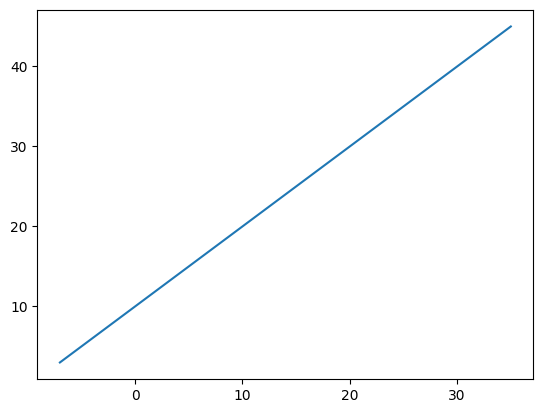

In [ ]:
plt.plot(X, y)

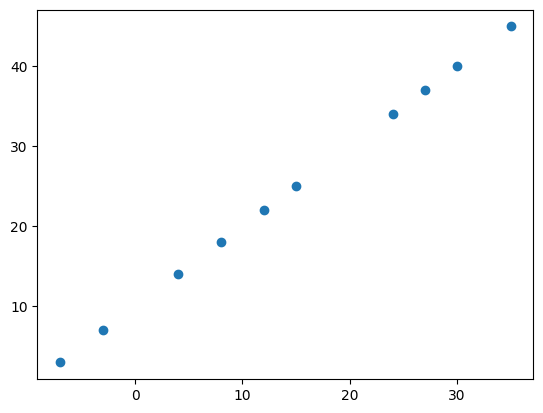

In [ ]:
plt.scatter(X, y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Input and output shape

In [ ]:
# Create a demo tensor input and output shape for housing price
house_info = tf.constant(['beedrom', 'kichen', 'garage'])
house_price = tf.constant([777999])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'beedrom', b'kichen', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([777999], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((10,), (10,))

## Steps in modeling in tensorflo
1. Creating a model - define the input and output layers, as well as the hidden layer of deep learning model
2. Compile a model - define the los function(in other word, the function tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation matrix(what we can use to interpret the performance of our model).
3. Fitting model - letting model try to find patterns between X & y (feature and label)

In [ ]:
# Prepare the Inputs and Output in tensor
X = tf.cast(tf.constant(X), tf.float32)
y = tf.cast(tf.constant(y), tf.float32)
X, y

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([-7., -3.,  4.,  8., 12., 15., 24., 27., 30., 35.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 3.,  7., 14., 18., 22., 25., 34., 37., 40., 45.], dtype=float32)>)

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # the reason why I am using 1 is I wan to build a model to get one number as input and pridect one number
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # loss function we could use "mae" as well
              optimizer=tf.keras.optimizers.SGD(), # optimizer function - SGD(Stochastic gradient descent)
              metrics=['mae'] # Metrics function
              )
# Reshape the Input layer
# tf.expand_dims(X, axis=-1)
# X

# 3. Fite the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # tell the model you got 5 opportunity to go through all x and y values and find pattern or relationship

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - loss: 29.2846 - mae: 29.2846
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 27.1721 - mae: 27.1721
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 25.0596 - mae: 25.0596
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 22.9471 - mae: 22.9471
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 20.8346 - mae: 20.8346


In [ ]:
X, y

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([-7., -3.,  4.,  8., 12., 15., 24., 27., 30., 35.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 3.,  7., 14., 18., 22., 25., 34., 37., 40., 45.], dtype=float32)>)

In [ ]:
arr = np.array([17.0])
arr

array([17.])

In [ ]:
# Try and make a pridection using our model
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[6.765478]], dtype=float32)

## Imporve our model
1. Create a model - here we might add more layers, increas the number of hideen unit(Neuron) and layers to each unit, change the activation function of each layer
2. Compile a model - here we might change the optimizer function or perhaps the learning rate of the ptimizer function
3. Fit a model - here we might add more epochs(give more time to learn) or give more example to learn from


In [ ]:
# Create model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               loss=tf.keras.losses.mae,
               metrics=['mae'])

# Fit the model
model2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step - loss: 24.9130 - mae: 24.9130
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 17.6868 - mae: 17.6868
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.8679 - mae: 9.8679
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.0971 - mae: 6.0971
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.4446 - mae: 8.4446
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.3375 - mae: 5.3375
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.8626 - mae: 3.8626
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.4508 - mae: 5.4508
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.8223 - mae: 3.8223
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 4.2467 - mae: 4.2467
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.7369 - mae: 4.7369
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4.3337 - mae: 4.3337
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53m

In [ ]:
X, y

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([-7., -3.,  4.,  8., 12., 15., 24., 27., 30., 35.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 3.,  7., 14., 18., 22., 25., 34., 37., 40., 45.], dtype=float32)>)

In [ ]:
model2.predict(np.array([200.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[214.56238]], dtype=float32)

## Evaluate the model

### When evaluating a model there 3 words you can keep in minde
> "Visualize, visualize, visualize"
It's a good idea to visualize:
* The data - what data we are working with? what does it look like?
* The model itself - what our model does looks like?
* The training model - how does our model perform while it's learning?
* The prediction if model - how do the prediction of a modal line up agains the ground truth

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
y = X+10
X, y


(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)



Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 46.0351 - mae: 46.0351
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.6364 - mae: 11.6364
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 16.7412 - mae: 16.7412
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 10.9570 - mae: 10.9570
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 13.3575 - mae: 13.3575
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 10.8496 - mae: 10.8496
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.2793 - mae: 8.2793
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.3617 - mae: 6.3617
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.1242 - mae: 6.1242
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.2899 - mae: 6.2899
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.3053 - mae: 5.3053
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.1770 - mae: 6.1770
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
#predict
model.predict(np.array([95]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[110.41811]], dtype=float32)

### The 3 sets
* **Training set** - The model learn from this data, which is typically 70%-80% of your total data available to train the model.
* **Validation set** - the model gets tuned on this data typically 10%-15% of the data available
* **Test data** - the model gets evaluate on this data to test what model is learned, this set is typically 10%-15% of the data available

In [ ]:
# Split the data into training and test set
X_train = X[:40] # the first 40 are the training samples (80% of the data)
y_train = y[:40]
X_test = X[40:] # the last 10 are the testing samples (20% of the data)
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

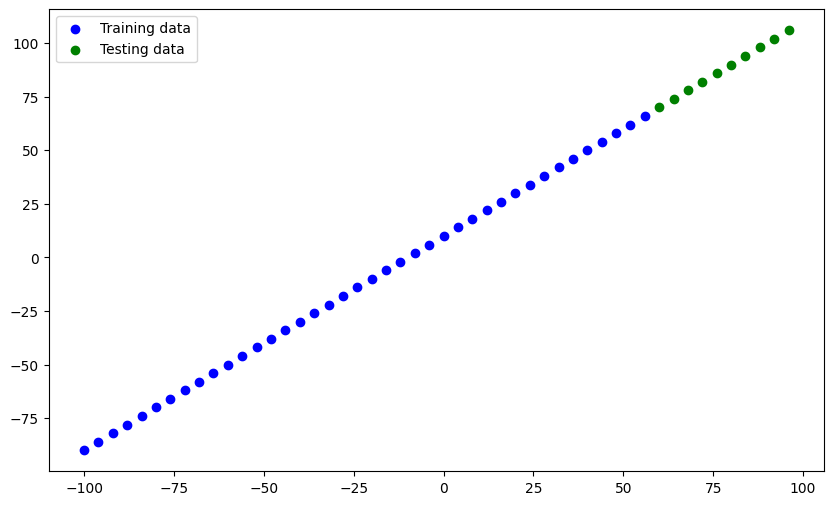

In [ ]:
# Visualizing the training and test dataset
plt.figure(figsize=(10, 6))

# Plot the train data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend()

In [ ]:
# Let's Create a new model for our dataset

# 1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics= ["mae"])

# 3. Fit the model over the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)



Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 56.6992 - mae: 56.6992 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19.6190 - mae: 19.6190
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.5891 - mae: 7.5891
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.3734 - mae: 11.3734
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 18.5117 - mae: 18.5117
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.7344 - mae: 9.7344  
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 23.8031 - mae: 23.8031
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.8756 - mae: 7.8756
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 8.5289 - mae: 8.5289
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.9090 - mae: 9.9090
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.0779 - mae: 12.0779
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.1718 - mae: 14.1718
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
X[0], y[0]


(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's create a model which build automatically by defining the input_shape in the first layer

tf.random.set_seed(42)
# 1. Create a model using sequential API
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(100, input_shape=[1]),
    # tf.keras.layers.Dense(200, input_shape=[1]),
    # tf.keras.layers.Dense(3, input_shape=[1])

    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=['mae'])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs= 5,)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step - loss: 7.4473 - mae: 7.4473
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 6.6900 - mae: 6.6900
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 5.9327 - mae: 5.9327
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 5.4487 - mae: 5.4487
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 5.4777 - mae: 5.4777
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 5.4787 - mae: 5.4787
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 5.4526 - mae: 5.4526
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 5.4362 - mae: 5.4362
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 5.4834 - mae: 5.4834
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 5.5718 - mae: 5.5718
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.4214 - mae: 5.4214
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 5.4742 - mae: 5.4742
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

* **The Total Params** - the total number of prameters in the model(These are the patern that your model going to learn).
* **Trainable Prams** - these are the parameters(patterns) the model can update as it trains.
* **Non-trainable Prams** - these parameters aren't updated during training(this is typicale when you in already learning patterns or parammeters from other model during **transfer learning**)

✅ when you use the already traind model to train we need to remove the non-trainable params


In [ ]:
# 1. create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"),
    tf.keras.layers.Dense(1, input_shape=[1], name="Output_layer"),
], name="Visualize_model")
# 2. compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=['mae'])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "Visualize_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 3. fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=2)

Epoch 1/100
2/2 - 0s - 216ms/step - loss: 65.9116 - mae: 65.9116
Epoch 2/100
2/2 - 0s - 22ms/step - loss: 37.1203 - mae: 37.1203
Epoch 3/100
2/2 - 0s - 29ms/step - loss: 41.0988 - mae: 41.0988
Epoch 4/100
2/2 - 0s - 35ms/step - loss: 20.5221 - mae: 20.5221
Epoch 5/100
2/2 - 0s - 23ms/step - loss: 12.7884 - mae: 12.7884
Epoch 6/100
2/2 - 0s - 24ms/step - loss: 20.2817 - mae: 20.2817
Epoch 7/100
2/2 - 0s - 25ms/step - loss: 7.7494 - mae: 7.7494
Epoch 8/100
2/2 - 0s - 24ms/step - loss: 14.4394 - mae: 14.4394
Epoch 9/100
2/2 - 0s - 22ms/step - loss: 11.1917 - mae: 11.1917
Epoch 10/100
2/2 - 0s - 23ms/step - loss: 10.9260 - mae: 10.9260
Epoch 11/100
2/2 - 0s - 22ms/step - loss: 10.2969 - mae: 10.2969
Epoch 12/100
2/2 - 0s - 23ms/step - loss: 29.1059 - mae: 29.1059
Epoch 13/100
2/2 - 0s - 23ms/step - loss: 11.3776 - mae: 11.3776
Epoch 14/100
2/2 - 0s - 24ms/step - loss: 14.8353 - mae: 14.8353
Epoch 15/100
2/2 - 0s - 24ms/step - loss: 16.9216 - mae: 16.9216
Epoch 16/100
2/2 - 0s - 23ms/step -

In [ ]:
model.summary()

Model: "Visualize_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

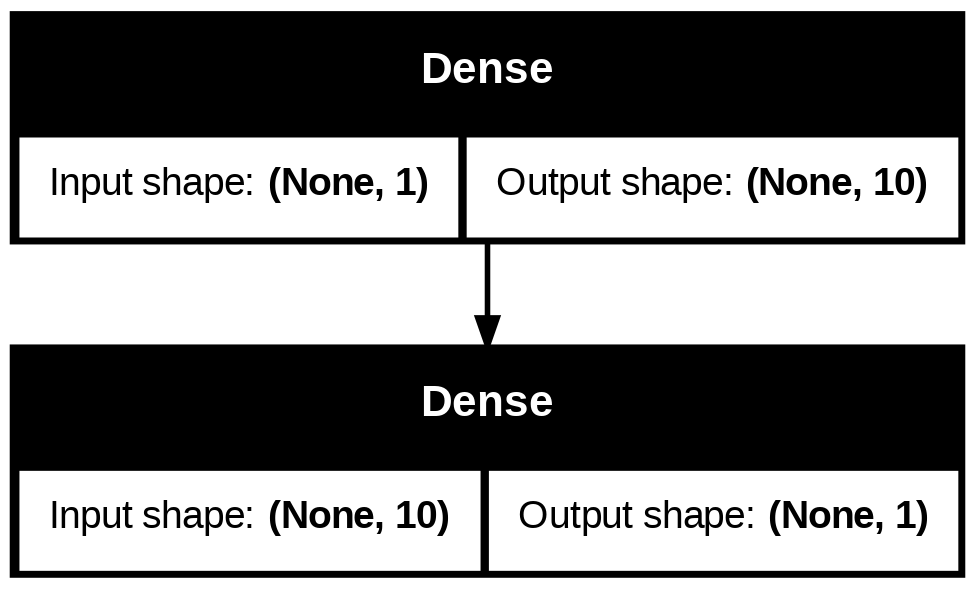

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes="true")

In [ ]:
X_train, y_train, X_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

### Visualizing our model prediction

In [ ]:
# Make some prediction
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[62.900925],
       [66.98162 ],
       [71.06231 ],
       [75.14301 ],
       [79.22371 ],
       [83.3044  ],
       [87.38511 ],
       [91.4658  ],
       [95.54651 ],
       [99.6272  ]], dtype=float32)

### Create a reusabel ploting function

In [ ]:
def plot_prediction(training_data=X_train,
                    training_label=y_train,
                    testing_data=X_test,
                    testing_label=y_test,
                    predictions=y_pred):
  plt.figure(figsize=(10, 7))

  # Training data in blue
  plt.scatter(training_data, training_label, c="b", label="Training data")

  # Testing data in green
  plt.scatter(testing_data, testing_label, c="g", label="Testing data")

  # Prediction data in red
  plt.scatter(testing_data, predictions, c="r", label="Prediction")

  plt.legend()

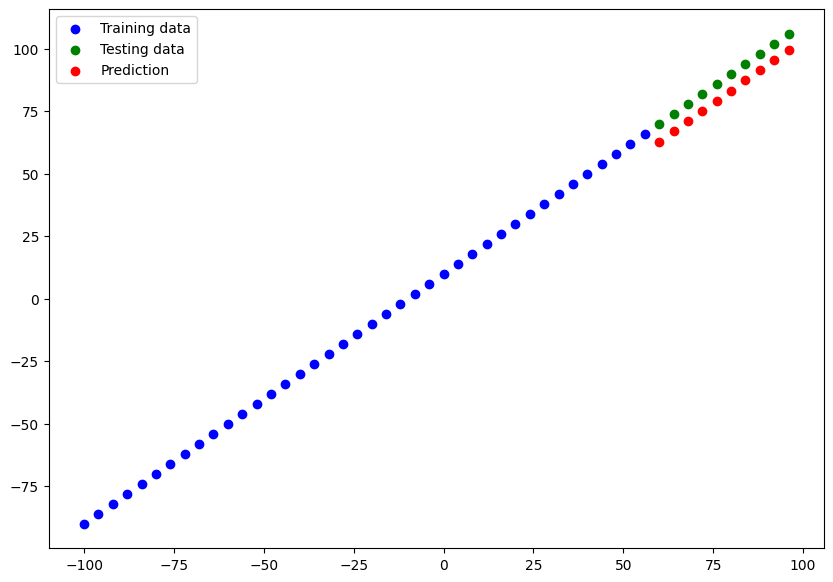

In [ ]:
plot_prediction()

## Evaluating our model's predictions with regression evaluation metics
Depending on your problem there will different evaluation metrics, since we are wroking on regression two very used evaluation metrics
* MAE - mean absolute error(on average how wrong is each of my model prediction)
* MSE -  mean square error(square the average error)

In [ ]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 56.6461 - mae: 56.6461


[56.64613723754883, 56.64613723754883]

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Evaluate a model with MSE
# 1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=['mae'])

# 3. Fite the model
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)


In [ ]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 6.7359 - mae: 6.7359


[6.735941410064697, 6.735941410064697]

In [ ]:
X_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[62.900925],
       [66.98162 ],
       [71.06231 ],
       [75.14301 ],
       [79.22371 ],
       [83.3044  ],
       [87.38511 ],
       [91.4658  ],
       [95.54651 ],
       [99.6272  ]], dtype=float32)

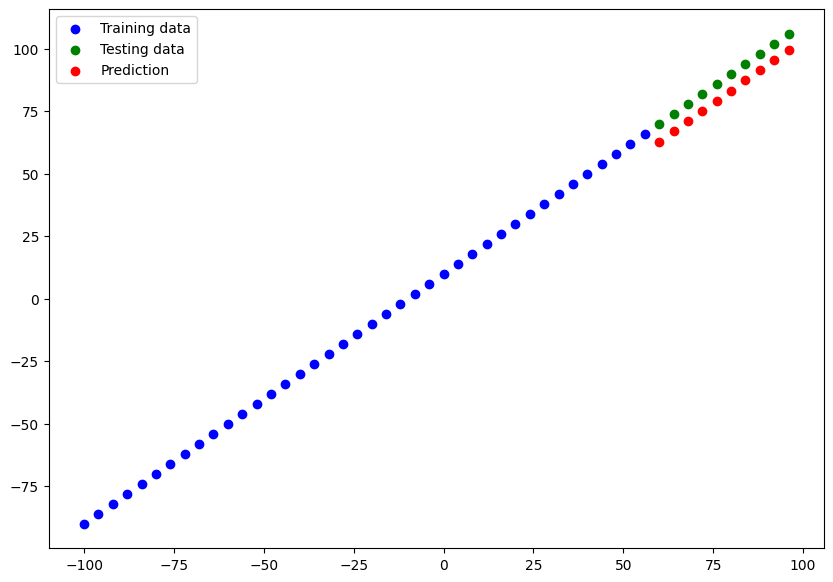

In [ ]:
plot_prediction(training_data=X_train, training_label=y_train, testing_data=X_test, testing_label=y_test, predictions=y_pred)

### Calculate the Mean Absolute Error(MAE)

In [ ]:
X_test, y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[62.900925],
        [66.98162 ],
        [71.06231 ],
        [75.14301 ],
        [79.22371 ],
        [83.3044  ],
        [87.38511 ],
        [91.4658  ],
        [95.54651 ],
        [99.6272  ]], dtype=float32))

In [ ]:
# Calculate the Mean absolute error
mae = tf.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.735941410064697>

### Calculate the Mean Squer Error

In [ ]:
mse = tf.metrics.mse(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=45.426631927490234>

In [ ]:
# Make a reusable function to get MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mae(y_true=y_true, y_pred=y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mse(y_true=y_true, y_pred=y_pred)

In [ ]:
y_test, y_pred


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[62.900925],
        [66.98162 ],
        [71.06231 ],
        [75.14301 ],
        [79.22371 ],
        [83.3044  ],
        [87.38511 ],
        [91.4658  ],
        [95.54651 ],
        [99.6272  ]], dtype=float32))

In [ ]:
mae(y_true=y_test, y_pred=tf.squeeze(y_pred))


<tf.Tensor: shape=(), dtype=float32, numpy=6.735941410064697>

In [ ]:
mse(y_true=y_test, y_pred=tf.squeeze(y_pred))


NameError: name 'mse' is not defined

## Running Experiment to improve our model
```
 Bild model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> ...
```
1. Get more data get more example for your model to train on(More opportunity to find the relationship or patterns between features and label)
2. Make your model larger(Using more complex model) - this might come in the form of more layer or more hidden units.
3. Train for longer - give your model more chance to find patterns in data

**Experiment with different model**

In [ ]:
tf.random.set_seed(42)
# 1. Create a model with one layer
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="Output_layer")
], name="Model_1")
# 2. compile the model
model_1.compile(optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.mae,
                metrics=['mae'])
# 3. Fit the model
model_1.fit(X_train, y_train, epochs=10, verbose=0)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Output_layer (Dense)            │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
X_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# Predict on test dataset
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[ 67.51934 ],
       [ 72.01301 ],
       [ 76.506676],
       [ 81.000336],
       [ 85.494   ],
       [ 89.98766 ],
       [ 94.48133 ],
       [ 98.975   ],
       [103.46866 ],
       [107.962326]], dtype=float32)

In [ ]:
# Check the MAE & MSE
mae_1 = tf.keras.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred_1))
mse_1 = tf.keras.metrics.mse(y_true=y_test, y_pred=tf.squeeze(y_pred_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.236628770828247>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0777320861816406>)

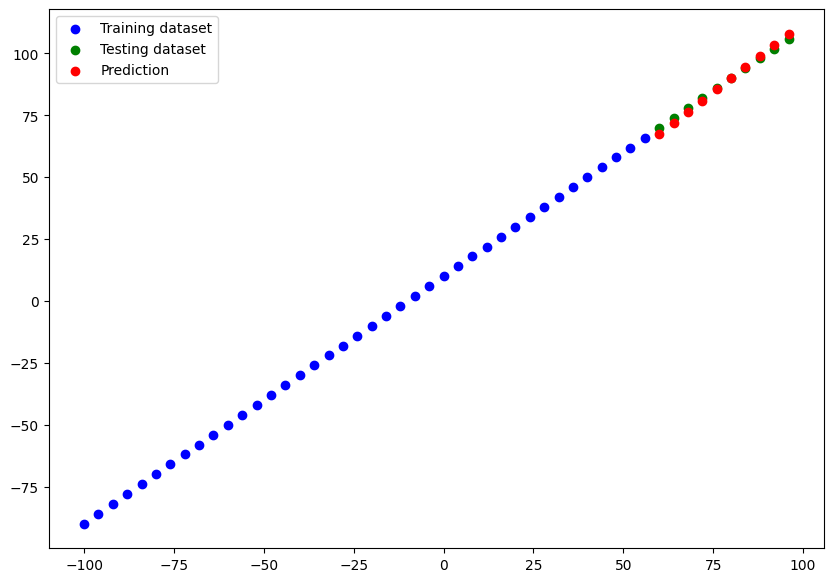

In [ ]:
# Visualize the model result
plt.figure(figsize=(10, 7))
# Training dataset in blue
plt.scatter(X_train, y_train, c="b", label="Training dataset")
# Testing dataset in green
plt.scatter(X_test, y_test, c="g", label="Testing dataset")
# Prediction in red
plt.scatter(X_test, y_pred_1, c="r", label="Prediction")
# show legen
plt.legend()

In [ ]:
# Experiment with 2 layers
tf.random.set_seed(42)
# 1. Create a model with Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layout"),
    tf.keras.layers.Dense(1, input_shape=[1], name="Output_layout")
], name="Model_2")
# 2. Compile the model
model_2.compile(optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.mae,
                metrics=['mae'])


In [ ]:
# sumarize mode
model_2.summary()

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layout (Dense)            │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layout (Dense)           │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 3. Fit the model
model_2.fit(X_train, y_train, epochs=10, verbose=0)

In [ ]:
# prediction
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[39.08069 ],
       [41.676186],
       [44.271687],
       [46.867188],
       [49.46269 ],
       [52.05819 ],
       [54.653694],
       [57.249187],
       [59.844696],
       [62.440193]], dtype=float32)

In [ ]:
# check MAE & MSE
mae_2 = tf.keras.metrics.mae(y_test, y_pred=tf.squeeze(y_pred_2))
mse_2 = tf.keras.metrics.mse(y_true=y_test, y_pred=tf.squeeze(y_pred_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=37.239559173583984>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1403.058837890625>)

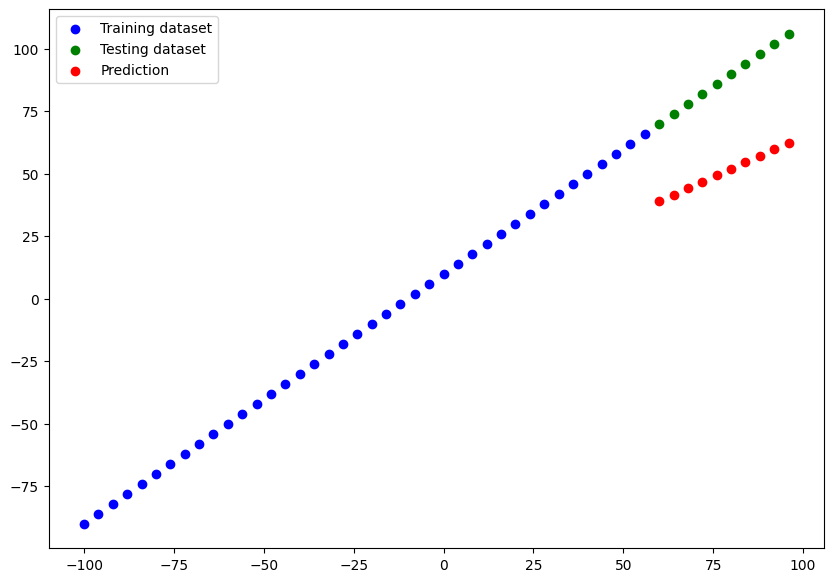

In [ ]:
# Visualize the model prediction
plt.figure(figsize=(10, 7))
# Training dataset in blue
plt.scatter(X_train, y_train, c="b", label="Training dataset")
# Testing Dataset in green
plt.scatter(X_test, y_test, c="g", label="Testing dataset")
# prediction in red
plt.scatter(X_test, y_pred_2, c="r", label="Prediction")
# Show legend
plt.legend()

In [ ]:
# Experiment with 2 layers and 50 epochs
tf.random.set_seed(42)
# 1. Create a model with Sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layout"),
    tf.keras.layers.Dense(1, input_shape=[1], name="Output_layout")
], name="Model_3")
# 2. Compile the model
model_3.compile(optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.mae,
                metrics=['mae'])

In [ ]:
model_3.summary()

Model: "Model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layout (Dense)            │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layout (Dense)           │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 3. Fit the model
model_3.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
# predict
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[46.521263],
       [49.563496],
       [52.60574 ],
       [55.647976],
       [58.690216],
       [61.732456],
       [64.7747  ],
       [67.816925],
       [70.85917 ],
       [73.90141 ]], dtype=float32)

In [ ]:
# Get the MAE & MSE
mae_3 = tf.keras.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred_3))
mse_3 = tf.keras.metrics.mse(y_true=y_test, y_pred=tf.squeeze(y_pred_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=27.788665771484375>,
 <tf.Tensor: shape=(), dtype=float32, numpy=779.7777099609375>)

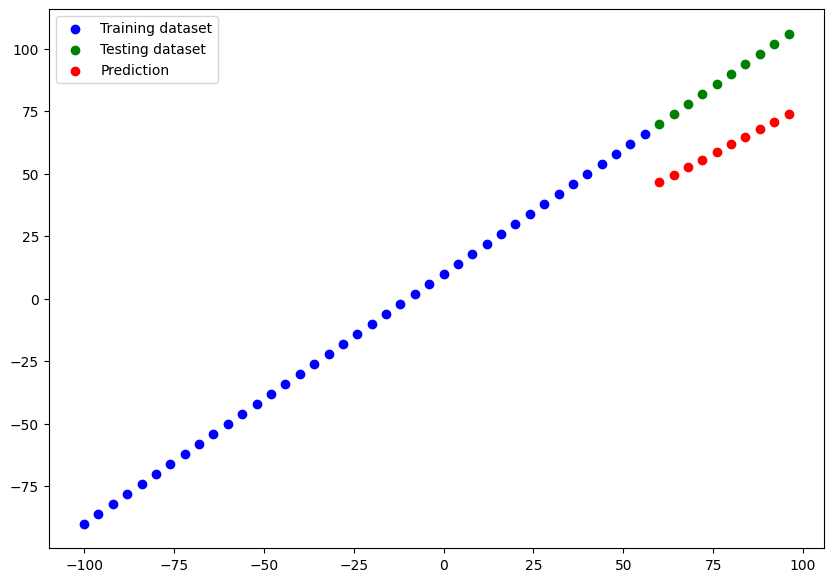

In [ ]:
# Visualize the prediction
plt.figure(figsize=(10, 7))
# training dataset in blue
plt.scatter(X_train, y_train, c="b", label="Training dataset")
# Testing dataset in green
plt.scatter(X_test, y_test, c="g", label="Testing dataset")
# Prediction dataset in red
plt.scatter(X_test, y_pred_3, c="r", label="Prediction")
# Show legen
plt.legend()

### Comparing and tracking the models result

In [ ]:
import pandas as pd
pd.__version__

'2.2.2'

In [ ]:
model_3.layers

[<Dense name=Input_layout, built=True>, <Dense name=Output_layout, built=True>]

In [ ]:
# let's compare our model using pandas dataFrame
model_result = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_result = pd.DataFrame(model_result, columns=["Model", "MAE", "MSE"])
all_result


,Model,MAE,MSE
0,model_1,1.236629,2.077732
1,model_2,37.239559,1403.058838
2,model_3,27.788666,779.777710


## Tracking your experiments

* **TensorBoard** - Component of tensorflow library to help track of modelling experiments.
* **Weights & Biases** - A tool for tracking all kind of machine learning modelling experiments(Plug strait into TensorBoard)

## Saveing our mode

Saveing our model allow us to use them outside of google colab ( or wherever they were trained  such as in a web application or mobile app)

There are two main formats we can save our model
* The savedModel format
* The HD5(h5) format

In [ ]:
# Save model in SavedModel format
model_1.save("saved_model.keras")

In [ ]:
# Reload the saved model
new_saved_model = tf.keras.models.load_model("saved_model.keras")



In [ ]:
# predict the test dataset by model 1
model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[ 67.51934 ],
       [ 72.01301 ],
       [ 76.506676],
       [ 81.000336],
       [ 85.494   ],
       [ 89.98766 ],
       [ 94.48133 ],
       [ 98.975   ],
       [103.46866 ],
       [107.962326]], dtype=float32)

In [ ]:
# Check the reloaded model
new_saved_model.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Output_layer (Dense)            │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# predict the test dataset by saved_mode
new_saved_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[ 67.51934 ],
       [ 72.01301 ],
       [ 76.506676],
       [ 81.000336],
       [ 85.494   ],
       [ 89.98766 ],
       [ 94.48133 ],
       [ 98.975   ],
       [103.46866 ],
       [107.962326]], dtype=float32)

In [ ]:
# Save a model using HDF5
model_1.save("save_model_hdf5.h5")

In [ ]:
# Reload the hdf4 model
new_hdf5_model = tf.keras.models.load_model("save_model_hdf5.h5")

In [ ]:
new_hdf5_model.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Output_layer (Dense)            │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
new_hdf5_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[ 67.51934 ],
       [ 72.01301 ],
       [ 76.506676],
       [ 81.000336],
       [ 85.494   ],
       [ 89.98766 ],
       [ 94.48133 ],
       [ 98.975   ],
       [103.46866 ],
       [107.962326]], dtype=float32)

In [ ]:
# Compare the prediction of saved model and the actual model
model_1_saved_pred = new_hdf5_model.predict(X_test)
model_1_pred = model_1.predict(X_test)
model_1_saved_pred == model_1_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_1_savedModel_ped = new_saved_model.predict(X_test)
model_1_savedModel_ped == model_1_saved_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Check the MAE and MSE
saved_model_mae = tf.keras.losses.mae(y_true=y_test, y_pred=tf.squeeze(model_1_savedModel_ped))
saved_model_mse = tf.keras.losses.mse(y_true=y_test, y_pred=tf.squeeze(model_1_savedModel_ped))
model_1_mae = tf.keras.losses.mae(y_true=y_test, y_pred=tf.squeeze(model_1_pred))
model_1_mse = tf.keras.losses.mse(y_true=y_test, y_pred=tf.squeeze(model_1_pred))
saved_model_mae, saved_model_mse, model_1_mae, model_1_mse

NameError: name 'tf' is not defined

# Larger Example

In [ ]:
import pandas as pd
# Read the dataset from github raw data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Convert to One Hot encoded

In [ ]:
insurance_one_hot = pd.get_dummies(insurance, dtype=float)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Get the X(Feature) which is all the dataset columns except the charges
X = insurance_one_hot.loc[ :, insurance_one_hot.columns != "charges"]
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Get the y(label) which is the charges column
y = insurance_one_hot['charges']
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


### Create a model to predict the insurance chargese based on the provided dataset

1. Praper the training, and testing dataset
2. Create the model
3. Predict based on the testing dataset
4. Visualize the prediction result

In [ ]:
# Preper the training(80% of all dataset) and testing(20% of all datase) dataset
training_index = int(0.8 * len(X)) # (80th%) index dataset
X_train = tf.constant(X[:training_index], dtype=tf.float32) # The first 80% of all datase
y_train = tf.constant(y[:training_index], dtype=tf.float32)
X_test = tf.constant(X[training_index:], dtype=tf.float32) # the last 20% of all datase
y_test = tf.constant(y[training_index:], dtype=tf.float32)

len(X_train), len(y_train), len(X_test), len(y_test)

(1070, 1070, 268, 268)

### Create the model

In [ ]:
# Testing dataset
X_train_t = tf.constant(X[:40], dtype=tf.float32)
y_train_t = tf.constant(y[:40], dtype=tf.float32)
X_test_t = tf.constant(X[40:50], dtype=tf.float32)
y_test_t = tf.constant(y[40:50], dtype=tf.float32)

len(X_train_t), len(y_train_t), len(X_test_t), len(y_test_t),

(40, 40, 10, 10)

In [ ]:
tf.random.set_seed(42)
# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="input_layer_1"),
    tf.keras.layers.Dense(100, name="input_layer_2.1"),
    tf.keras.layers.Dense(100, name="input_layer_3.1"),
    tf.keras.layers.Dense(1, name="outpu_layer")
], name="Medical_cost_model")
# 2. Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.mae,
              metrics=['mae'])

In [ ]:
# 3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 9512.5205 - mae: 9512.5205
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6104.1538 - mae: 6104.1538
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5913.8271 - mae: 5913.8271
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5255.2983 - mae: 5255.2983
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4434.1895 - mae: 4434.1895
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3648.0791 - mae: 3648.0791
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3493.7698 - mae: 3493.7698
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3426.4133 - mae: 3426.4133
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3381.4270 - mae: 3381.4270
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3418.9155 - mae: 3418.9155
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3510.2366 - mae: 3510.2366
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [ ]:
model.summary()

Model: "Medical_cost_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (Dense)           │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input_layer_2.1 (Dense)         │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input_layer_3.1 (Dense)         │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outpu_layer (Dense)             │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,505 (251.98 KB)

 Trainable params: 21,501 (83.99 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 43,004 (167.99 KB)

## Make a prediction

In [ ]:
y_pred = model.predict(X_test)
y_pred

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([[3.74001914e+04],
       [1.32284697e+04],
       [1.38795178e+03],
       [1.20077773e+04],
       [1.22676221e+04],
       [4.89743457e+03],
       [9.01057031e+03],
       [1.46219092e+03],
       [3.42203477e+04],
       [1.42510703e+04],
       [9.18567871e+02],
       [4.79801660e+03],
       [6.16374268e+03],
       [4.51780029e+03],
       [1.40057881e+04],
       [3.95222812e+04],
       [1.09349102e+04],
       [1.13147607e+04],
       [1.07245010e+04],
       [1.02820684e+04],
       [3.96181914e+04],
       [1.13087549e+04],
       [3.09143164e+03],
       [3.31709336e+04],
       [1.14124102e+04],
       [3.19031104e+03],
       [4.25986445e+04],
       [1.44776843e+03],
       [1.05204219e+04],
       [3.12939795e+03],
       [3.70629414e+04],
       [1.12058867e+04],
       [4.06868115e+03],
       [1.14482881e+04],
       [5.32867383e+03],
       [1.05130068e+04],
       [9.39504395e+03],
       [1.05447002e+04],
       [2.81046167e+03],
       [8.80837207e+03],


## Visualize the result

In [ ]:
len(X_train_t), len(y_train_t),

(40, 40)

In [ ]:
X_train_t.shape,  y_train_t.shape, X_train_t[:, 0].shape, tf.squeeze(y_pred).shape, X_test.shape

(TensorShape([40, 11]),
 TensorShape([40]),
 TensorShape([40]),
 TensorShape([268]),
 TensorShape([268, 11]))

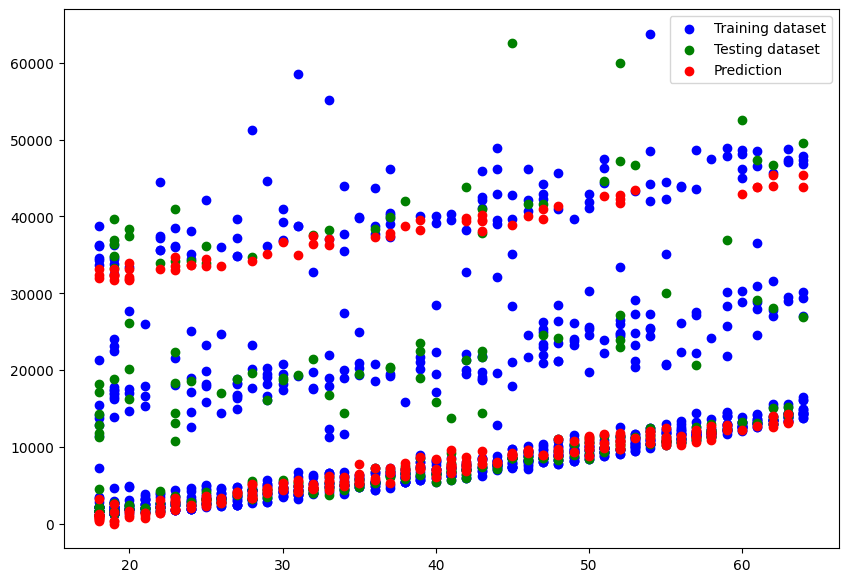

In [ ]:
plt.figure(figsize=(10, 7))
# The training dataset in blue
plt.scatter(X_train[:, 0], y_train, c="b", label="Training dataset")
# The testing dataset in green
plt.scatter(X_test[:, 0], y_test, c="g", label="Testing dataset")
# The prediction in red
plt.scatter(X_test[:, 0], tf.squeeze(y_pred), c="r", label="Prediction")


# Show legend
plt.legend()


In [ ]:
# Check MAE and MSE
mae = tf.keras.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse = tf.keras.metrics.mse(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=3487.94970703125>,
 <tf.Tensor: shape=(), dtype=float32, numpy=47182932.0>)

In [ ]:
tf.keras.ops.mean(y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=13214.1259765625>

In [ ]:
tf.keras.ops.median(y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=9333.0146484375>

In [ ]:
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3153.3618 - mae: 3153.3618 


[3487.949951171875, 3487.949951171875]

# Preprocessing data(Normalization and Standardization)

In [ ]:
import pandas as pd

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Praper the Feture(independent) & Label(dependent) variable
X = insurance.drop(columns="charges", axis=1)
y = insurance['charges']
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


<Axes: ylabel='Frequency'>

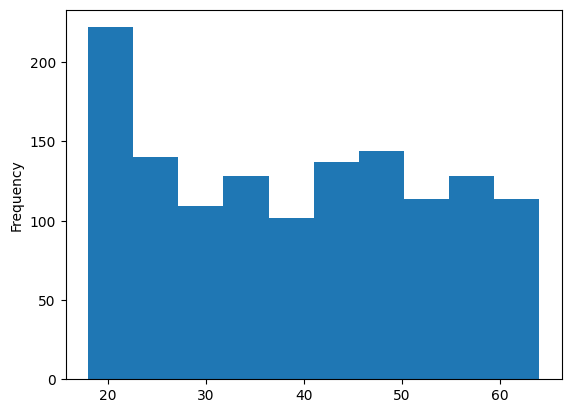

In [ ]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

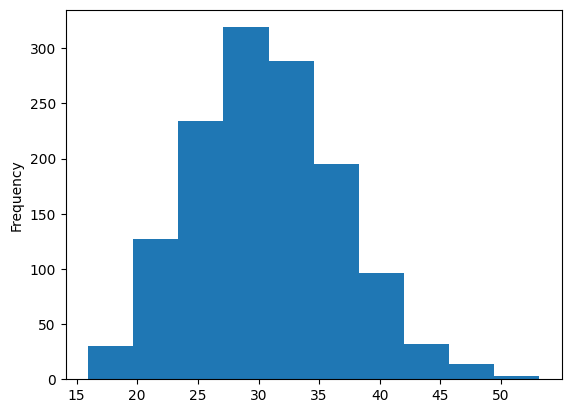

In [ ]:
X['bmi'].plot(kind="hist")

In [ ]:
X['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


In [ ]:
# Get the training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(1070, 1070, 268, 268)

In [ ]:
# Preprocess the X_train, X_test dataset
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
preprocessor = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)
# fit X_train to the column transformer
preprocessor.fit(X_train)
X_train_normal = preprocessor.transform(X_train)
X_test_normal = preprocessor.transform(X_test)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
# 1. Create the model using sequention API
model_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="Input_layer"),
    tf.keras.layers.Dense(1, name="Output_layer")
], name="Model_1_Normal")
# 2. Compile the model
model_normal.compile(optimizer=tf.keras.optimizers.SGD(),
                     loss=tf.keras.losses.mae,
                     metrics=['mae'])

In [ ]:
# the model will stop training if it found 100 repetative result while learning
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)

In [ ]:
# 3. Fit the model
normal_history = model_normal.fit(X_train_normal, y_train, epochs=500, verbose=0, callbacks=[callback])

<Axes: title={'center': 'Model 1 prepocessed'}, xlabel='epochs', ylabel='loss'>

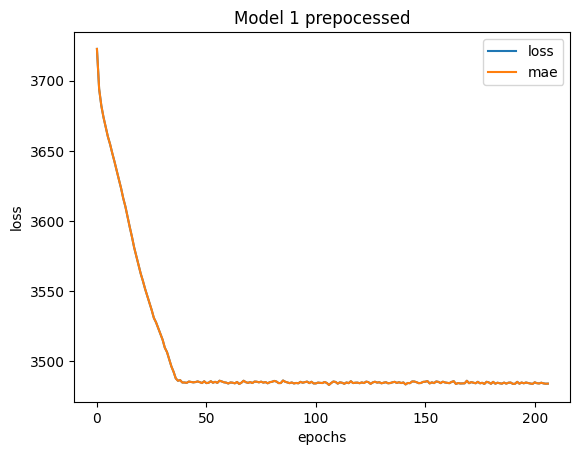

In [ ]:
# Display the loss curve
pd.DataFrame(normal_history.history).plot(title="Model 1 prepocessed", ylabel='loss', xlabel="epochs")

In [ ]:
# make a prediction
y_pred_normal = model_normal.predict(X_test_normal, verbose=0)


In [ ]:
# Get the MAE preprocessor.fit(X_train)
mae_normal = tf.keras.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred_normal))
mae_normal

<tf.Tensor: shape=(), dtype=float32, numpy=3161.80712890625>

In [ ]:
# Experiment with mor layers
# 1. Create a model using sequention API
tf.random.set_seed(42)
model_normal_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="Input_layer_1"),
    tf.keras.layers.Dense(100, name="Input_layer_2"),
    tf.keras.layers.Dense(1, name="Output_layer")
], name="Model_2_Normal")
# 2. Compile the model
model_normal_2.compile(optimizer=tf.keras.optimizers.SGD(),
                     loss=tf.keras.losses.mae,
                     metrics=['mae'])
# 3. Fit the model
normal_history_2 = model_normal_2.fit(X_train_normal, y_train, epochs=1000, verbose=0, callbacks=[callback])

<Axes: title={'center': 'Model 2  Preprocessed'}, xlabel='Epochs', ylabel='Losses'>

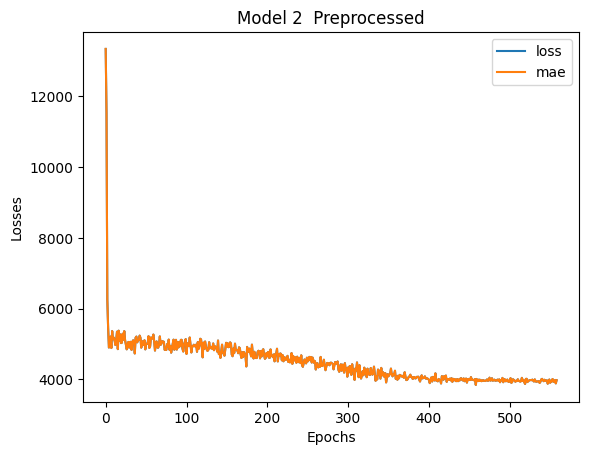

In [ ]:
pd.DataFrame(normal_history_2.history).plot(title="Model 2  Preprocessed", xlabel="Epochs", ylabel="Losses")

In [ ]:
# Experiment with Adam optimizer
# 1. Create a model using sequention API
tf.random.set_seed(42)
model_normal_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="Input_layer_1"),
    tf.keras.layers.Dense(100, name="Input_layer_2"),
    tf.keras.layers.Dense(1, name="Output_layer")
], name="Model_3_Normal")
# 2. Compile the model
model_normal_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                     loss=tf.keras.losses.mae,
                     metrics=['mae'])
# 3. Fit the model
normal_history_3 = model_normal_3.fit(X_train_normal, y_train, epochs=1000, verbose=0, callbacks=[callback])

<Axes: title={'center': 'Model 3 preprocessed'}, xlabel='Epochs', ylabel='Losses'>

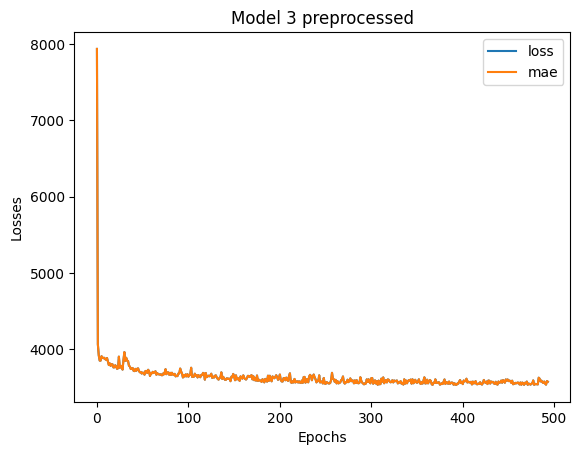

In [ ]:
pd.DataFrame(normal_history_3.history).plot(title="Model 3 preprocessed", xlabel="Epochs", ylabel="Losses")

In [ ]:
# Experiment with Adam optimizer and less layer
# 1. Create a model using sequention API
tf.random.set_seed(42)
model_normal_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="Input_layer_1"),
    tf.keras.layers.Dense(1, name="Output_layer")
], name="Model_4_Normal")
# 2. Compile the model
model_normal_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                     loss=tf.keras.losses.mae,
                     metrics=['mae'])
# 3. Fit the model
normal_history_4 = model_normal_4.fit(X_train_normal, y_train, epochs=1000, verbose=0, callbacks=[callback])

<Axes: title={'center': 'Model 4 preprocessed'}>

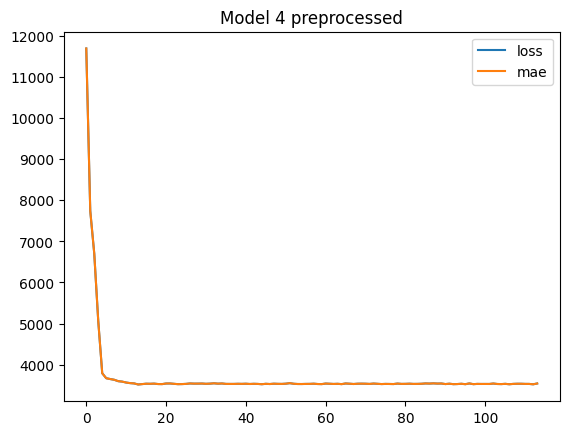

In [ ]:
pd.DataFrame(normal_history_4.history).plot(title="Model 4 preprocessed")

In [ ]:
# Experiment with Adam optimizer and less learning rate
# 1. Create a model using sequention API
tf.random.set_seed(42)
model_normal_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="Input_layer_1"),
    tf.keras.layers.Dense(100, name="Input_layer_2"),
    tf.keras.layers.Dense(1, name="Output_layer")
], name="Model_5_Normal")
# 2. Compile the model
model_normal_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     loss=tf.keras.losses.mae,
                     metrics=['mae'])
# 3. Fit the model
normal_history_5 = model_normal_5.fit(X_train_normal, y_train, epochs=1000, verbose=0, callbacks=[callback])

<Axes: title={'center': 'model 5 preprocessed'}>

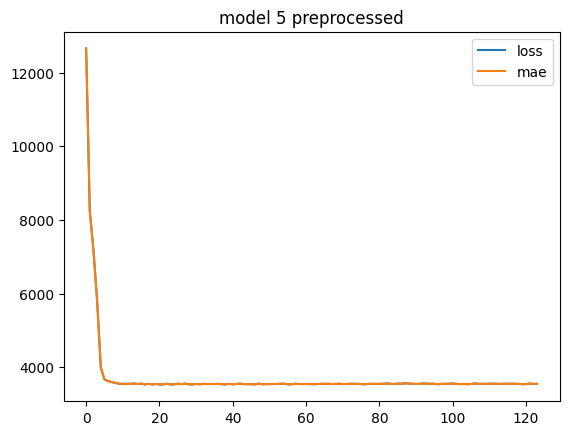

In [ ]:
pd.DataFrame(normal_history_5.history).plot(title="model 5 preprocessed")

In [ ]:
# Experiment with Adam optimizer and less learning rate  and more layer
# 1. Create a model using sequention API
tf.random.set_seed(42)
model_normal_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="Input_layer_1"),
    tf.keras.layers.Dense(100, name="Input_layer_2"),
    tf.keras.layers.Dense(100, name="Input_layer_3"),
    tf.keras.layers.Dense(100, name="Input_layer_4"),
    tf.keras.layers.Dense(1, name="Output_layer")
], name="Model_6_Normal")
# 2. Compile the model
model_normal_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     loss=tf.keras.losses.mae,
                     metrics=['mae'])
# 3. Fit the model
normal_history_6 = model_normal_6.fit(X_train_normal, y_train, epochs=1000, verbose=0, callbacks=[callback])

<Axes: title={'center': 'Model 6 preprocessed'}>

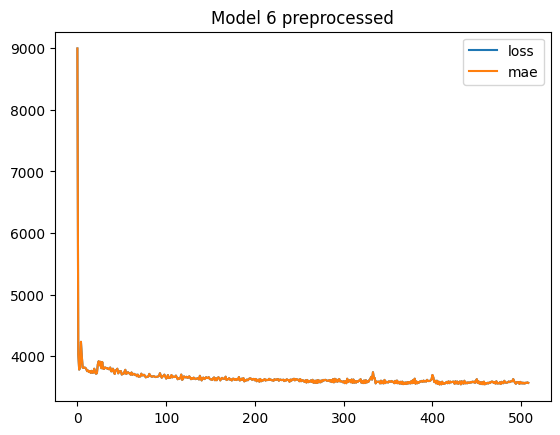

In [ ]:
pd.DataFrame(normal_history_6.history).plot(title="Model 6 preprocessed")

In [ ]:
# Experiment with one layer
# 1. Create a model using sequention API
tf.random.set_seed(42)
model_normal_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="Output_layer")
], name="Model_7_Normal")
# 2. Compile the model
model_normal_7.compile(optimizer=tf.keras.optimizers.SGD(),
                     loss=tf.keras.losses.mae,
                     metrics=['mae'])
# 3. Fit the model
normal_history_7 = model_normal_7.fit(X_train_normal, y_train, epochs=1000, verbose=0, callbacks=[callback])

<Axes: title={'center': 'Model 7 preprocessed'}>

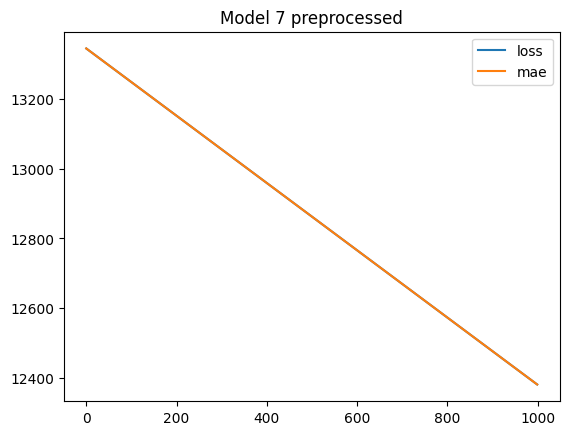

In [ ]:
pd.DataFrame(normal_history_7.history).plot(title="Model 7 preprocessed")

In [ ]:
# Experiment with 2 layer and Adam optimizer
# 1. Create a model using sequention API
tf.random.set_seed(42)
model_normal_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="Input_layer"),
    tf.keras.layers.Dense(1, name="Output_layer")
], name="Model_8_Normal")
# 2. Compile the model
model_normal_8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     loss=tf.keras.losses.mae,
                     metrics=['mae'])
# 3. Fit the model
normal_history_8 = model_normal_8.fit(X_train_normal, y_train, epochs=1000, verbose=0, callbacks=[callback])

<Axes: title={'center': 'Model 8 preprocessed'}>

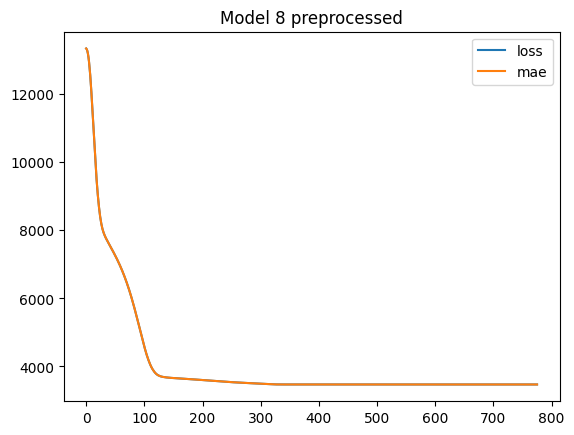

In [ ]:
pd.DataFrame(normal_history_8.history).plot(title="Model 8 preprocessed")